# Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq
import scienceplots
plt.style.use("science")

In [65]:
def compare_fft_analytical(func, analytical_solution, N=4096, L=40.0, 
                           xlim=None, klim=None, b=0):
    """
    Vergleicht die numerische FFT einer Funktion mit ihrer analytischen Fourier-Transformation.
    
    Parameters
    ----------
    func : callable
        Die zu transformierende Funktion f(x)
    analytical_solution : callable
        Die analytische Fourier-Transformation F(k)
    N : int, optional
        Anzahl der Diskretisierungspunkte (default: 4096)
    L : float, optional
        Länge des Intervalls [-L/2, L/2] (default: 40.0)
    xlim : tuple, optional
        Grenzen für x-Achse im ersten Plot (default: None)
    klim : tuple, optional
        Grenzen für k-Achse im zweiten Plot (default: None)
    b : int, optional
        Wenn ungleich 0, wird das Argument (Phase) der Fourier-Transformation mit Verschiebung b angezeigt (default: 0)
    
    Returns
    -------
    fig : matplotlib.figure.Figure
        Die erstellte Figure
    axes : array of matplotlib.axes.Axes
        Die beiden Subplot-Achsen

    Examples
    --------
    >>> def f(x):
    ...     return np.sign(x) * np.exp(-np.abs(x))
    >>> def F_analytical(k):
    ...     return 1j * 2 * k / (1 + k**2)
    >>> fig, axes, results = compare_fft_analytical(f, F_analytical)
    >>> plt.show()
    """
    
    x = np.linspace(-L/2, L/2, N)
    dx = x[1] - x[0]
    
    Fk_numerical = fftshift(fft(func(x))) * dx
    k = fftshift(fftfreq(N, d=dx)) * 2 * np.pi
    
    # Plotting
    if b:
        fig, axes = plt.subplots(2, 2, figsize=(10, 8))
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    

    axes[0].plot(x, func(x), "b-", linewidth=1)
    axes[0].set_xlabel(r"$x$", fontsize=14)
    axes[0].set_ylabel(r"$f(x)$", fontsize=14)
    axes[0].grid(True)
    if xlim is not None:
        axes[0].set_xlim(xlim)
    
    # Plot 2: Betrag der Fourier-Transformation |F(k)|
    axes[1].plot(k, np.abs(Fk_numerical), "b-", linewidth=1, label="Numerisch (FFT)")
    axes[1].plot(k, np.abs(analytical_solution(k)), "r--", linewidth=1, label="Analytisch")
    axes[1].set_xlabel(r"$k$", fontsize=14)
    axes[1].set_ylabel(r"$|\mathcal{F}(k)|$", fontsize=14)
    axes[1].legend(fontsize=12, frameon=True)
    axes[1].grid(True)
    if klim is not None:
        axes[1].set_xlim(klim)
    
    if b:
        axes[2].axis('off')
        
        arg_analytical = np.angle(analytical_solution(k))
        arg_compare = np.angle(analytical_solution(k) * np.exp(-1j*b*k))
        axes[3].plot(k, arg_analytical, "r-", linewidth=1, label=f"Verschoben b={b}")
        axes[3].plot(k, arg_compare, "k-", linewidth=1, label="Orginal")
        axes[3].set_xlabel(r"$k$", fontsize=14)
        axes[3].set_ylabel(r"$\arg(\mathcal{F}(k))$", fontsize=14)
        axes[3].grid(True)
        if klim is not None:
            axes[3].set_xlim(klim)
        axes[3].set_ylim(-np.pi, np.pi)
    
    plt.tight_layout()

    return fig, axes

## Aufgabe 1

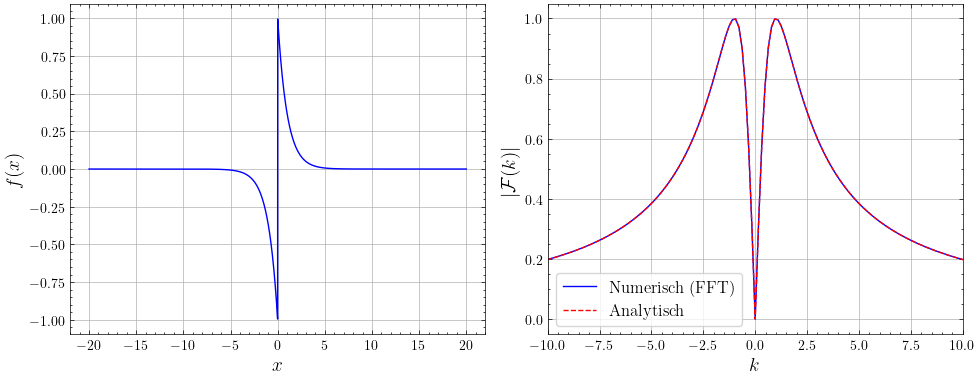

In [47]:
def f1(x): 
    return np.sign(x) * np.exp(-np.abs(x))
    
def F1_analytical(k):
    return 1j * 2 * k / (1 + k**2)

fig1, axes1 = compare_fft_analytical(
    f1, F1_analytical,
    klim=(-10, 10)
)

## Aufgabe 2

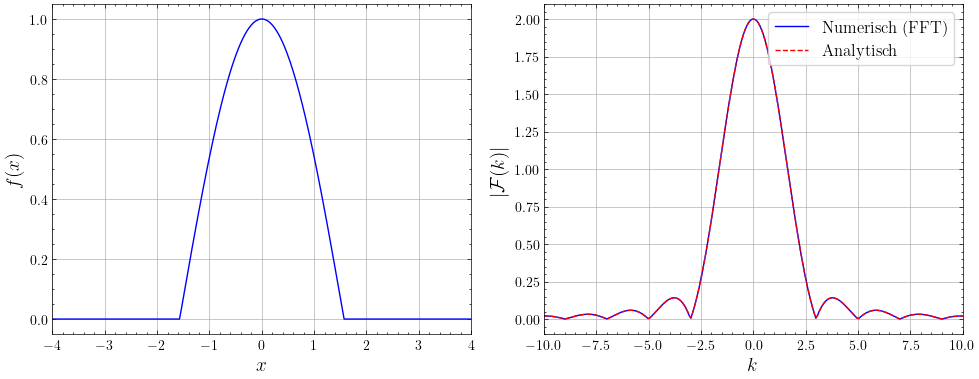

In [48]:
def f1(x): 
    return np.where(np.abs(x) < np.pi/2, np.cos(x), 0)
    
def F1_analytical(k):
    return 2*np.sin(np.pi/2 * (1 - k)) / (1-k**2)

fig1, axes1 = compare_fft_analytical(
    f1, F1_analytical, L=80.0,
    xlim=(-4,4),
    klim=(-10, 10)
)

## Aufgabe 4

### a

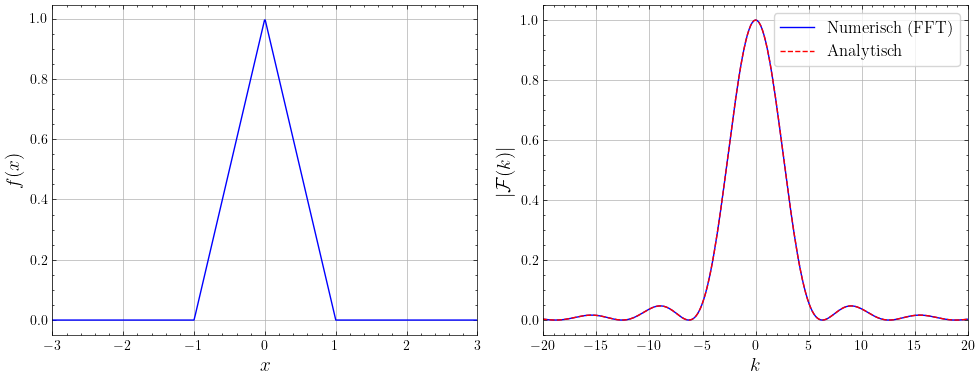

In [49]:
def f1(x): 
    return np.maximum(1-np.abs(x),0)
    
def F1_analytical(k):
    result = np.zeros_like(k, dtype=complex)
        
    mask = k != 0
    result[mask] = 2 * (1 - np.cos(k[mask])) / k[mask]**2
    result[~mask] = 1.0
    return result
    return 2*(1-np.cos(k)) / k**2

fig1, axes1 = compare_fft_analytical(
    f1, F1_analytical,
    xlim=(-3, 3),
    klim=(-20, 20)
)

### b

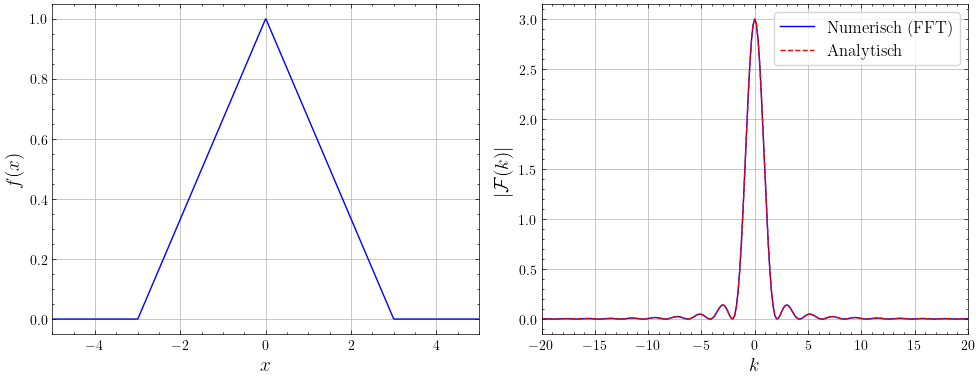

In [50]:
a = 3
def f1(x): 
    return np.maximum(1-np.abs(x/a),0)
    
def F1_analytical(k):
    result = np.zeros_like(k, dtype=complex)
        
    mask = k != 0
    result[mask] = 2 * (1 - np.cos(a*k[mask])) / (a*k[mask]**2)
    result[~mask] = a
    return result
    return 2*(1-np.cos(a*k)) / (a*k**2)

fig1, axes1 = compare_fft_analytical(
    f1, F1_analytical,
    xlim=(-5, 5),
    klim=(-20, 20)
)

### c

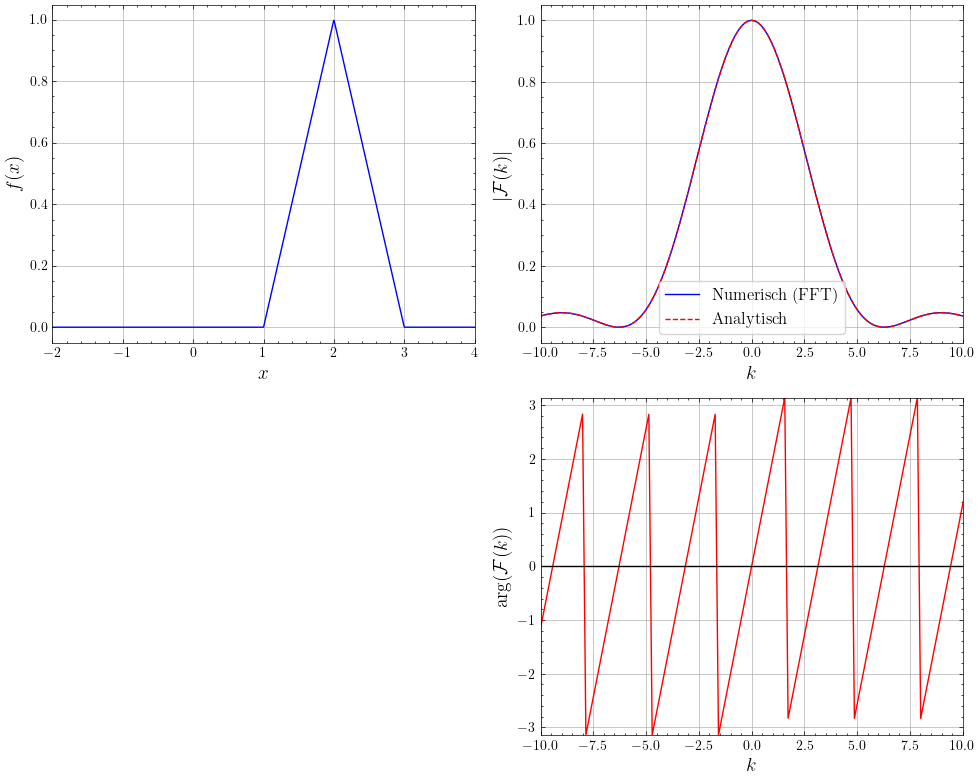

In [67]:
b = 2
def f1(x): 
    return np.maximum(1-np.abs(x-b),0)
    
def F1_analytical(k):
    result = np.zeros_like(k, dtype=complex)
        
    mask = k != 0
    result[mask] = 2 * (1 - np.cos(k[mask])) / k[mask]**2
    result[~mask] = 1.0
    return np.exp(1j*b*k)*result
    return 2*(1-np.cos(k)) / k**2

fig1, axes1 = compare_fft_analytical(
    f1, F1_analytical,
    xlim=(-2, 4),
    klim=(-10, 10),
    b=b
)